In [203]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px
import pickle


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [204]:
!pip install rfpimp
import rfpimp

In [205]:
pd.options.mode.chained_assignment = None  # default='warn'

In [206]:
df = pd.read_csv("../data/clean/bank-additional-clean.csv")
df.head()

age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school      no      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  campaign  pdays  previous     poutcome  emp_var_rate  \
0         mon         1    999         0  nonexistent           1.1   
1         mon         1    999         0  nonexistent           1.1   
2         mon         1    999         0  nonexistent           1.1   
3         mon         1    999         0  nonexistent           1.1   
4         mon         1    999         0  nonexistent           1.1   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

In [207]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y'],
      dtype='object')

## Divide to train and test data

In [208]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)
df_train

age          job   marital            education default housing loan  \
15230   43       admin.   married          high.school      no     yes  yes   
10078   31  blue-collar   married             basic.9y      no      no   no   
33534   78      retired   married             basic.4y      no      no  yes   
32890   23      student    single             basic.9y      no      no   no   
35328   27      student    single    university.degree      no      no  yes   
...    ...          ...       ...                  ...     ...     ...  ...   
16850   34  blue-collar   married  professional.course      no      no  yes   
6265    45   technician  divorced  professional.course      no      no   no   
11284   37  blue-collar    single          high.school      no     yes   no   
860     44  blue-collar   married             basic.4y      no     yes   no   
15795   30   technician   married  professional.course      no      no   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
15230   cellular   jul         mon         2    999         0  nonexistent   
10078  telephone   jun         thu         1    999         0  nonexistent   
33534   cellular   aug         wed         1    999         0  nonexistent   
32890   cellular   jul         tue         6    999         0  nonexistent   
35328   cellular   jun         mon         2      3         4      success   
...          ...   ...         ...       ...    ...       ...          ...   
16850   cellular   aug         tue         4    999         0  nonexistent   
6265   telephone   may         thu         7    999         0  nonexistent   
11284  telephone   jul         mon         8    999         0  nonexistent   
860    telephone   may         wed         1    999         0  nonexistent   
15795   cellular   jul         tue        19    999         0  nonexistent   

       emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed   y  
15230           1.4          93.918          -42.7      4.962       5228.1  no  
10078           1.4          94.465          -41.8      4.961       5228.1  no  
33534          -2.9          92.201          -31.4      0.834       5076.2  no  
32890          -2.9          92.469          -33.6      0.908       5076.2  no  
35328          -1.7          94.055          -39.8      0.720       4991.6  no  
...             ...             ...            ...        ...          ...  ..  
16850           1.4          93.444          -36.1      4.968       5228.1  no  
6265            1.1          93.994          -36.4      4.860       5191.0  no  
11284           1.4          93.918          -42.7      4.960       5228.1  no  
860             1.1          93.994          -36.4      4.856       5191.0  no  
15795           1.4          93.918          -42.7      4.961       5228.1  no  

[24467 rows x 20 columns]

## Encoding Categorical Data

In [209]:
categorical_columns = ["job", "marital", "education", "housing", "default", "loan", "contact", "education", "day_of_week", "poutcome"]

In [210]:
for col in categorical_columns:
    df_train[col] = df_train[col].astype('category')

In [211]:
df_train = pd.get_dummies(df_train)
df_train = df_train.rename(columns={'y_yes': 'y'})

In [212]:
df_train = df_train.drop(['y_no'], axis=1)

In [213]:
df_train.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome

In [214]:
X = df_train.loc[:, df_train.columns != 'y']
y = df_train.loc[:, df_train.columns == 'y']

In [215]:
X

age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
15230   43         2    999         0           1.4          93.918   
10078   31         1    999         0           1.4          94.465   
33534   78         1    999         0          -2.9          92.201   
32890   23         6    999         0          -2.9          92.469   
35328   27         2      3         4          -1.7          94.055   
...    ...       ...    ...       ...           ...             ...   
16850   34         4    999         0           1.4          93.444   
6265    45         7    999         0           1.1          93.994   
11284   37         8    999         0           1.4          93.918   
860     44         1    999         0           1.1          93.994   
15795   30        19    999         0           1.4          93.918   

       cons_conf_idx  euribor3m  nr_employed  job_admin.  ...  month_oct  \
15230          -42.7      4.962       5228.1           1  ...          0   
10078          -41.8      4.961       5228.1           0  ...          0   
33534          -31.4      0.834       5076.2           0  ...          0   
32890          -33.6      0.908       5076.2           0  ...          0   
35328          -39.8      0.720       4991.6           0  ...          0   
...              ...        ...          ...         ...  ...        ...   
16850          -36.1      4.968       5228.1           0  ...          0   
6265           -36.4      4.860       5191.0           0  ...          0   
11284          -42.7      4.960       5228.1           0  ...          0   
860            -36.4      4.856       5191.0           0  ...          0   
15795          -42.7      4.961       5228.1           0  ...          0   

       month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
15230          0                0                1                0   
10078          0                0                0                1   
33534          0                0                0                0   
32890          0                0                0                0   
35328          0                0                1                0   
...          ...              ...              ...              ...   
16850          0                0                0                0   
6265           0                0                0                1   
11284          0                0                1                0   
860            0                0                0                0   
15795          0                0                0                0   

       day_of_week_tue  day_of_week_wed  poutcome_failure  \
15230                0                0                 0   
10078                0                0                 0   
33534                0                1                 0   
32890                1                0                 0   
35328                0                0                 0   
...                ...              ...               ...   
16850                1                0                 0   
6265                 0                0                 0   
11284                0                0                 0   
860                  0                1                 0   
15795                1                0                 0   

       poutcome_nonexistent  poutcome_success  
15230                     1                 0  
10078                     1                 0  
33534                     1                 0  
32890                     1                 0  
35328                     0                 1  
...                     ...               ...  
16850                     1                 0  
6265                      1                 0  
11284                     1                 0  
860                       1                 0  
15795                     1                 0  

[24467 rows x 56 columns]

In [216]:
y

y
15230  0
10078  0
33534  0
32890  0
35328  0
...   ..
16850  0
6265   0
11284  0
860    0
15795  0

[24467 rows x 1 columns]

# Traint Test Split

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
model=DecisionTreeClassifier(max_depth=16)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Model Evaluation

In [219]:
y_pred = model.predict(X_test)

In [220]:
accuracy_score(y_test, y_pred)

0.8690232938291785

In [221]:
precision_score(y_test, y_pred)

0.45036319612590797

In [222]:
recall_score(y_test, y_pred)

0.31

In [223]:
f1_score(y_test, y_pred)

0.3672260612043435

# K-Folds Cross Validation

In [224]:
model=DecisionTreeClassifier(max_depth=16)
model.fit(X_train, y_train)
scores = cross_validate(model, X, y, cv=3, scoring=('accuracy', 'average_precision', 'recall','f1'))

In [225]:
scores

{'fit_time': array([0.1032877 , 0.10224843, 0.10027313]),
 'score_time': array([0.01402473, 0.01406169, 0.0150342 ]),
 'test_accuracy': array([0.87432565, 0.87138303, 0.87198038]),
 'test_average_precision': array([0.24767797, 0.252937  , 0.24723369]),
 'test_recall': array([0.29689175, 0.31511254, 0.30653805]),
 'test_f1': array([0.35085497, 0.35919365, 0.3539604 ])}

# Random Forest

In [226]:
rfc = RandomForestClassifier(n_estimators=10)
rfc_scores = cross_validate(rfc, X, y.values.ravel(), cv=3, scoring=('accuracy', 'average_precision', 'recall','f1'))

In [227]:
rfc_scores

{'fit_time': array([0.15144253, 0.1463902 , 0.15240788]),
 'score_time': array([0.03909492, 0.0401547 , 0.03910255]),
 'test_accuracy': array([0.88965179, 0.89443355, 0.88694053]),
 'test_average_precision': array([0.34625368, 0.36125456, 0.33561383]),
 'test_recall': array([0.27009646, 0.28081458, 0.25294748]),
 'test_f1': array([0.35897436, 0.37833935, 0.33859397])}

In [228]:
report = pd.DataFrame(index=list(rfc_scores.keys())[2:], columns=['Decision Tree', 'Random Forest'])
for key in report.index:
  report.loc[key] = [np.mean(scores[key]), np.mean(rfc_scores[key])]

report['Improvement'] = report['Random Forest'] - report['Decision Tree']
report *= 100
report = report.astype(float).round(1)

In [229]:
report # decision tree depth 16 - the best

Decision Tree  Random Forest  Improvement
test_accuracy                    87.3           89.0          1.8
test_average_precision           24.9           34.8          9.8
test_recall                      30.6           26.8         -3.8
test_f1                          35.5           35.9          0.4

With higher max_depth for decision tree test recall gets better but the test average precision gets lower. We picked 16 as the optimal solution.

# Feature Importance

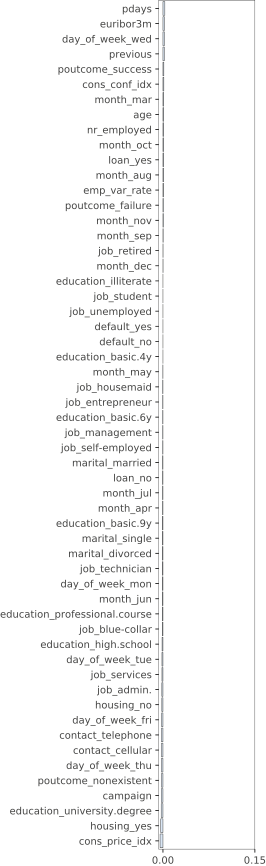

In [230]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train.values.ravel())
importance = rfpimp.importances(rfc, X_test, y_test)
rfpimp.plot_importances(importance)

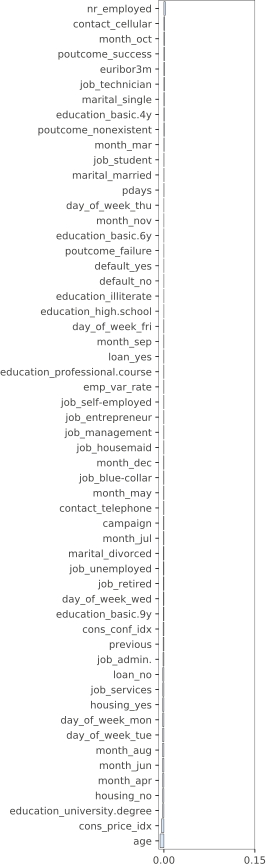

In [231]:
model=DecisionTreeClassifier(max_depth=16)
rfc.fit(X_train, y_train.values.ravel())
importance = rfpimp.importances(rfc, X_test, y_test)
rfpimp.plot_importances(importance)

In [232]:
pickle.dump(model, open('../models/DecisionTree.model', 'wb'))
pickle.dump(rfc, open('../models/RandomForrest.model', 'wb'))

## Predicting Output of the Train Dataset to check model error

In [233]:
train_predict = rfc.predict(X_train)

In [234]:
mean_squared_error(y_train, train_predict)

0.01721759566750115

## Predicting test data

In [235]:
for col in categorical_columns:
    df_test[col] = df_test[col].astype('category')
df_test_categorized = pd.get_dummies(df_test)
df_test_categorized = df_test_categorized.rename(columns={'y_yes': 'y'})
df_test_categorized = df_test_categorized.drop(['y_no'], axis=1)

In [236]:
df_test_categorized.shape

(12051, 56)

Check feature diff

In [237]:
feature_diff = set(X_train) - set(df_test_categorized)
feature_diff

{'default_yes'}

In [238]:
missing_feature = pd.DataFrame(data=np.zeros((df_test_categorized.shape[0], len(feature_diff))),
                           columns=list(feature_diff))

In [239]:
missing_feature.default_yes.value_counts()

0.0    12051
Name: default_yes, dtype: int64

In [240]:
missing_feature.default_yes

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12046    0.0
12047    0.0
12048    0.0
12049    0.0
12050    0.0
Name: default_yes, Length: 12051, dtype: float64

default_yes was missing a feature, add it to the df_test_categorized

In [241]:
df_test_categorized = df_test_categorized.join(missing_feature)

In [242]:
df_test_categorized.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
    

In [243]:
df_test_categorized.default_yes.unique()

array([nan,  0.])

In [244]:
df_test_categorized.default_yes.fillna(0.0, inplace=True)

In [245]:
df_test_categorized.default_yes.unique()

array([0.])

In [246]:
X_test_data = df_test_categorized.loc[:, df_test_categorized.columns != 'y']
y_test_data = df_test_categorized.loc[:, df_test_categorized.columns == 'y']

In [247]:
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [248]:
X_test_data.default_yes.unique()

array([0.])

In [249]:
prediction = model.predict(X_test_data)

In [250]:
prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [251]:
accuracy_score(y_test_data, prediction)

0.843747406854203

In [252]:
precision_score(y_test_data, prediction)

0.3146964856230032

In [253]:
recall_score(y_test_data, prediction)

0.2776603241719521

In [254]:
f1_score(y_test_data, prediction)

0.29502059153874954

In [255]:
mean_squared_error(y_test_data, prediction)

0.15625259314579704